## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
# 作業
# 1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？

from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier(criterion='entropy',  # 調整參數
                             max_depth=10,
                             min_samples_split=3,
                             min_samples_leaf=2,
                            )

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

print(iris.feature_names)

print("Feature importance: ", clf.feature_importances_)

# Acuuracy:  0.9736842105263158 ，跟調整前沒有差異

Acuuracy:  0.9736842105263158
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.03550457 0.         0.07800198 0.88649346]


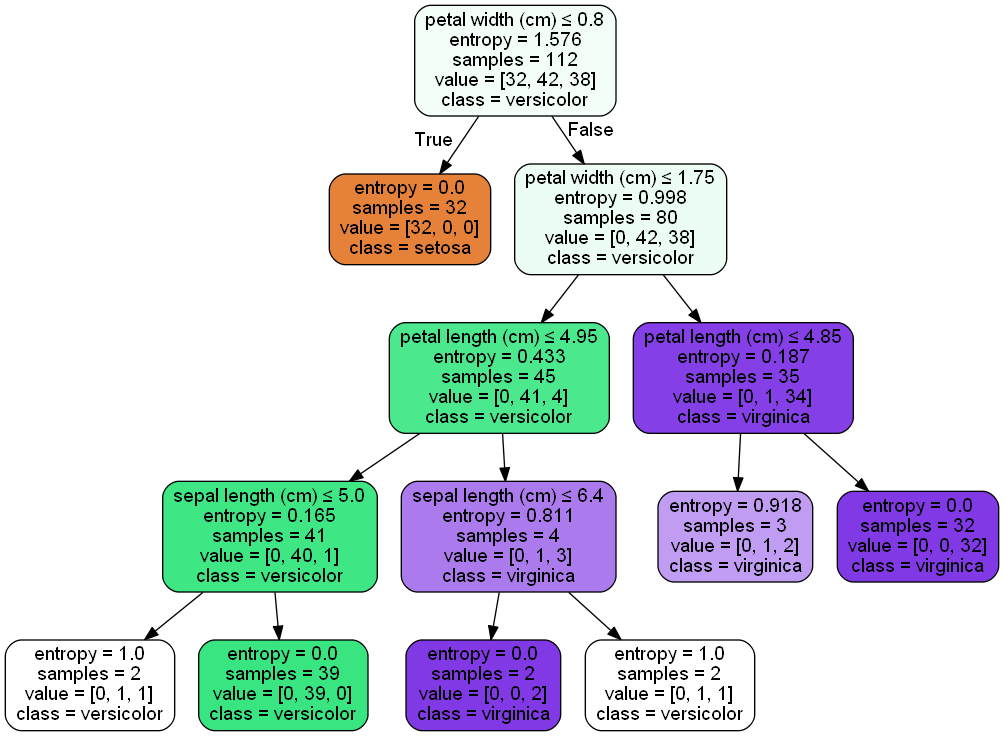

In [2]:
# 利用graphviz畫出決策樹的圖

from IPython.display import Image
#from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
#print(os.environ['PATH'])

# 匯出成檔案
#with open("iris.dot", 'w') as f:
#    f = export_graphviz(clf, out_file=f)

#dot_data = StringIO()
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

### Boston dataset

In [3]:
# 作業
# 2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

from sklearn.metrics import mean_absolute_error, mean_squared_error

# 讀取波士頓房價資料集
boston = datasets.load_boston()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeRegressor()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

acc = clf.score(x_test, y_test)
print("R-squared value: ", acc)

mse = mean_squared_error(y_test, y_pred)
print("mean squared error: ", mse)

mae = mean_absolute_error(y_test, y_pred)
print("mean absolute error: ", mae)

print(boston.feature_names)

print("Feature importance: ", clf.feature_importances_)

R-squared value:  0.7219407820189667
mean squared error:  27.898661417322835
mean absolute error:  3.451181102362205
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Feature importance:  [6.86071211e-02 1.25548351e-03 8.92866604e-03 5.16062560e-05
 2.93358692e-02 5.42187924e-01 1.48462723e-02 6.82883821e-02
 5.01671725e-04 1.00370715e-02 2.47770436e-02 8.94226609e-03
 2.22240623e-01]


### Wine dataset

In [4]:
# 讀取紅酒資料集
wine = datasets.load_wine()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier(criterion='entropy',  # 調整參數，用entropy比gini準一點
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1,
                            )
# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

print(wine.feature_names)

print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.9777777777777777
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Feature importance:  [0.01794699 0.01571782 0.         0.         0.         0.
 0.41359716 0.         0.         0.2188998  0.         0.
 0.33383822]
